In [1]:
# Import Penguins dataset

install.packages("palmerpenguins")

Installing package into 'C:/Users/Badr/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'palmerpenguins' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Badr\AppData\Local\Temp\RtmpMVSvF9\downloaded_packages


In [2]:
library(tidyverse)

library(palmerpenguins)
data(package = 'palmerpenguins')
df <- penguins %>% 
        select(-year)

df <- na.omit(df)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
head(df)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
Adelie,Torgersen,39.1,18.7,181,3750,male
Adelie,Torgersen,39.5,17.4,186,3800,female
Adelie,Torgersen,40.3,18.0,195,3250,female
Adelie,Torgersen,36.7,19.3,193,3450,female
Adelie,Torgersen,39.3,20.6,190,3650,male
Adelie,Torgersen,38.9,17.8,181,3625,female


In [4]:
dim(df)

[1] 333   7

In [5]:
colnames(df)

[1] "species"           "island"            "bill_length_mm"   
[4] "bill_depth_mm"     "flipper_length_mm" "body_mass_g"      
[7] "sex"

In [6]:
unique(df$species)

[1] Adelie    Gentoo    Chinstrap
Levels: Adelie Chinstrap Gentoo

In [7]:
# Number of NA's per column
colSums(is.na(df))

species            island    bill_length_mm     bill_depth_mm 
                0                 0                 0                 0 
flipper_length_mm       body_mass_g               sex 
                0                 0                 0

In [8]:
summary(penguins)

      species          island    bill_length_mm  bill_depth_mm  
 Adelie   :152   Biscoe   :168   Min.   :32.10   Min.   :13.10  
 Chinstrap: 68   Dream    :124   1st Qu.:39.23   1st Qu.:15.60  
 Gentoo   :124   Torgersen: 52   Median :44.45   Median :17.30  
                                 Mean   :43.92   Mean   :17.15  
                                 3rd Qu.:48.50   3rd Qu.:18.70  
                                 Max.   :59.60   Max.   :21.50  
                                 NA's   :2       NA's   :2      
 flipper_length_mm  body_mass_g       sex           year     
 Min.   :172.0     Min.   :2700   female:165   Min.   :2007  
 1st Qu.:190.0     1st Qu.:3550   male  :168   1st Qu.:2007  
 Median :197.0     Median :4050   NA's  : 11   Median :2008  
 Mean   :200.9     Mean   :4202                Mean   :2008  
 3rd Qu.:213.0     3rd Qu.:4750                3rd Qu.:2009  
 Max.   :231.0     Max.   :6300                Max.   :2009  
 NA's   :2         NA's   :2                  

In [9]:
# Penguins species : 'Adelie', 'Chinstrap':
penguins_sub <- df  %>% 
    subset(species != "Chinstrap")

In [10]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


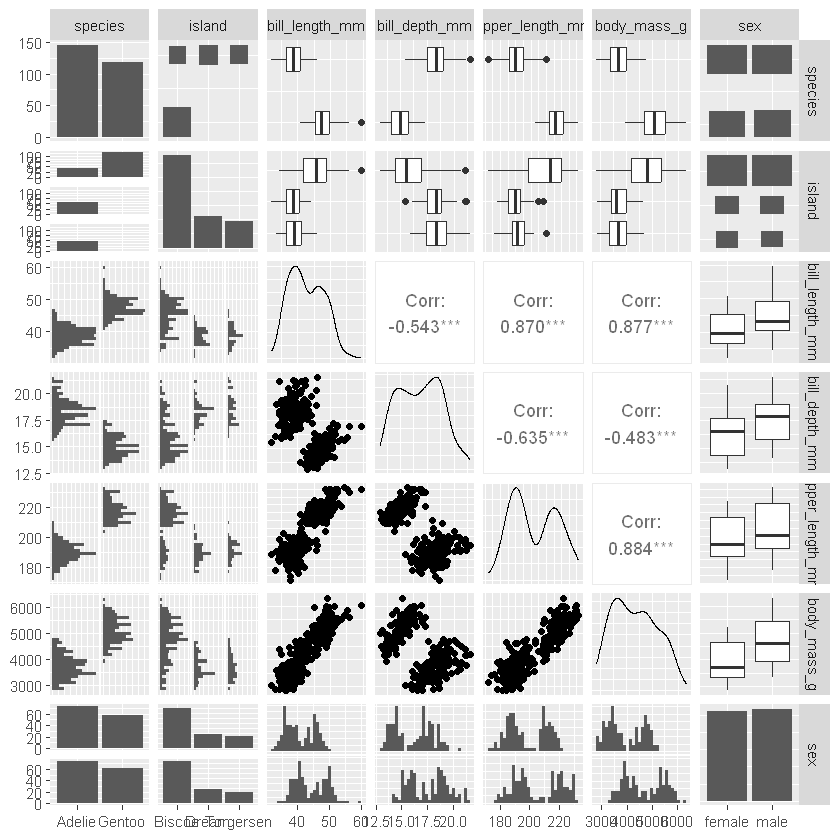

In [11]:
# looking for linear relationships between the features :
ggpairs(penguins_sub)

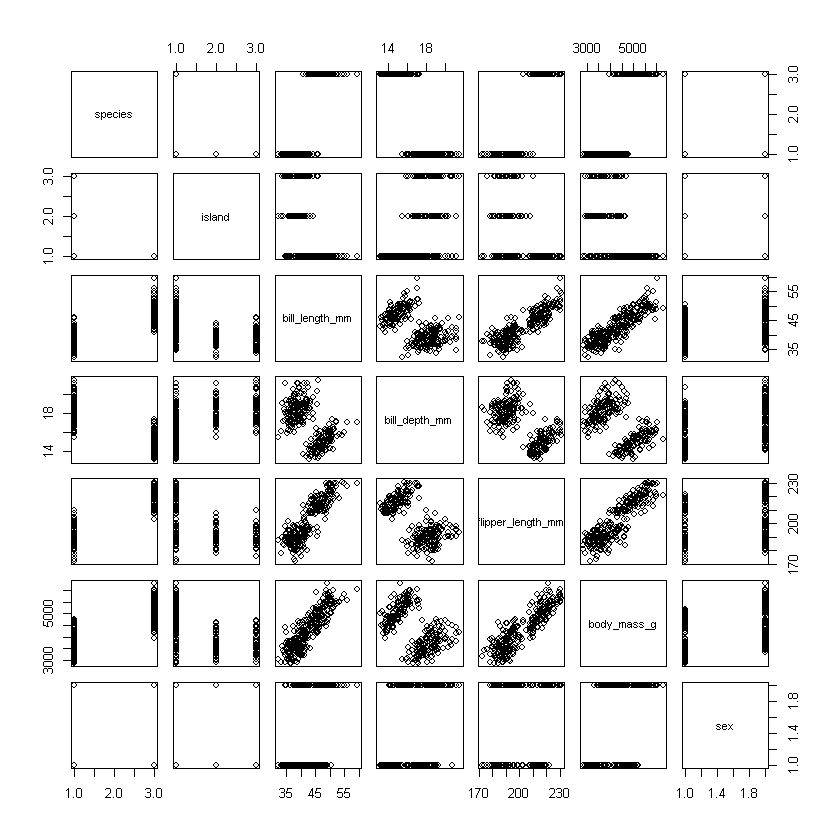

In [12]:
pairs(penguins_sub)

### Normality

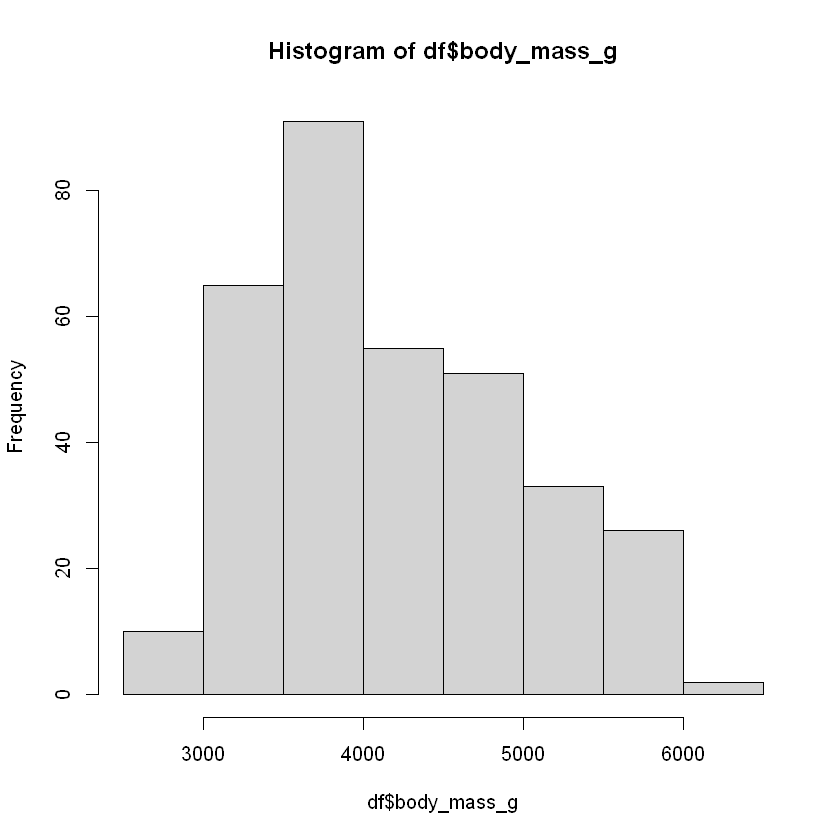

In [13]:
hist(df$body_mass_g)

### Linearity

In [14]:
library(ggplot2)

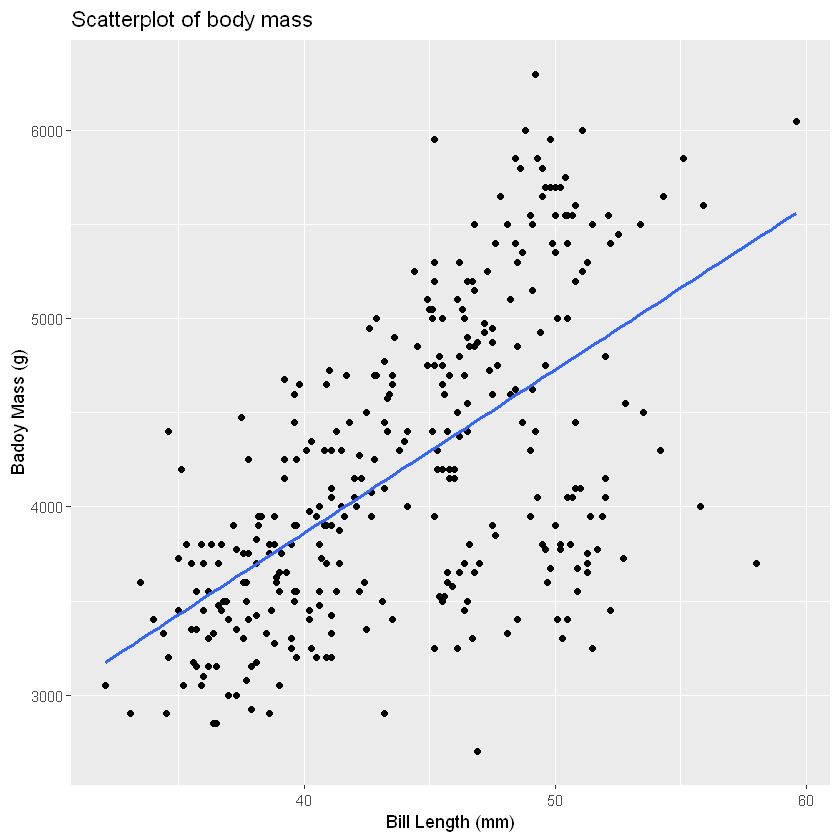

In [15]:
ggplot(df, aes(x=bill_length_mm, y=body_mass_g))+
    geom_point()+
    labs(x="Bill Length (mm)",
        y = "Badoy Mass (g)",
        title = "Scatterplot of body mass ") + 
  geom_smooth(method = 'lm', formula = y ~ x, se = FALSE) 

`bill_length_mm` and `body_mass_g` have a linear relatioship

## Build the model

In [16]:
cor(df$body_mass_g, df$bill_length_mm)

[1] 0.5894511

In [17]:
# Assuming penguins_sub is your data frame
model_data <- penguins_sub[c('bill_length_mm', 'body_mass_g')]
model_formula <- body_mass_g ~ bill_length_mm

# Fit the linear regression model
model <- lm(model_formula, data = model_data)

# Display model summary
summary(model)


Call:
lm(formula = model_formula, data = model_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-895.64 -275.56   -2.64  278.98 1275.48 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1707.292    205.640  -8.302 5.42e-15 ***
bill_length_mm   141.190      4.775  29.569  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 404.6 on 263 degrees of freedom
Multiple R-squared:  0.7688,	Adjusted R-squared:  0.7679 
F-statistic: 874.3 on 1 and 263 DF,  p-value: < 2.2e-16


## Visualize the predictions

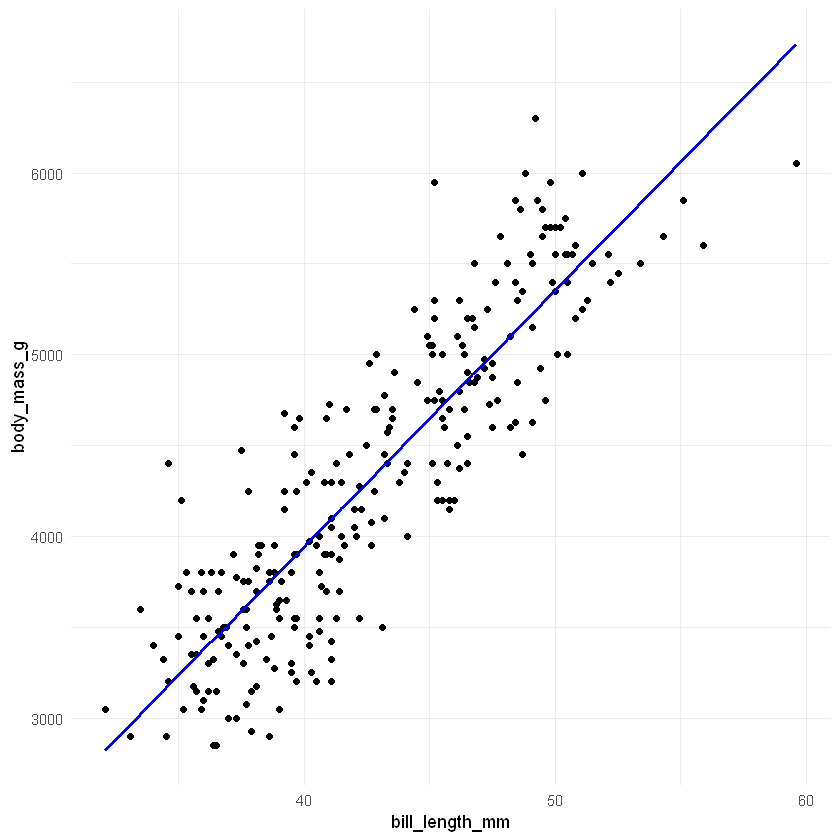

In [18]:
# Assuming ols_data is your data frame
X <- model_data$bill_length_mm

# Get predictions from the model
fitted_values <- predict(model, newdata = data.frame(bill_length_mm = X))

# Calculate residuals
residuals <- residuals(model)

# Plot the regression
library(ggplot2)
ggplot(model_data, aes(x = bill_length_mm, y = body_mass_g)) +
  geom_point() +
  geom_smooth(method = "lm",formula = y~x, se = FALSE, color = "blue") +
  theme_minimal()

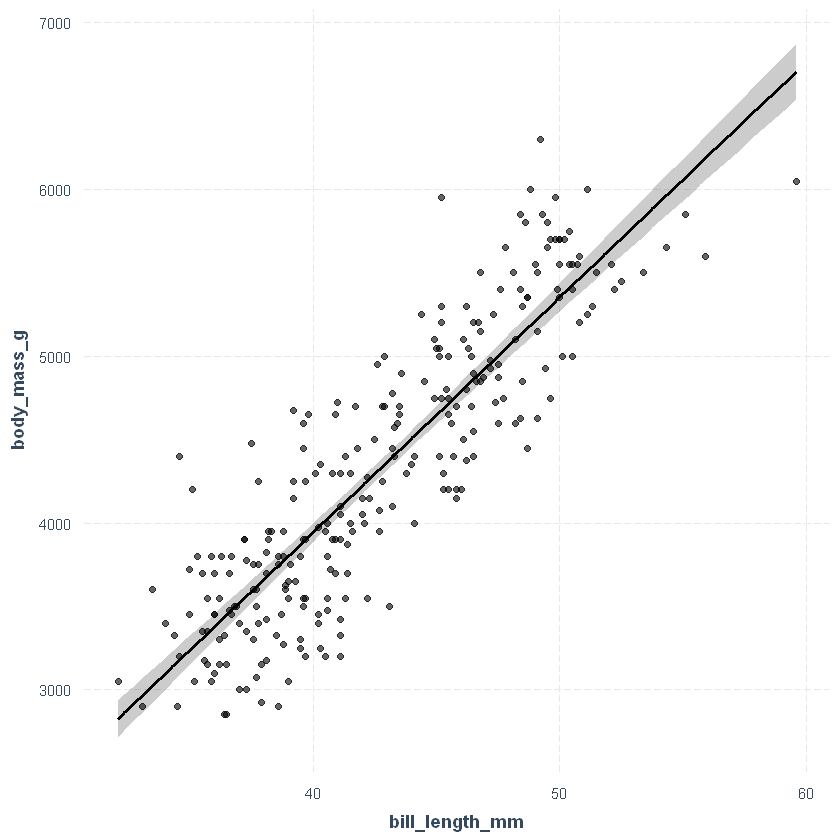

In [19]:
# visualize the prediction with the interval 
library(jtools)
effect_plot(model, pred = bill_length_mm, interval = TRUE, plot.points = TRUE)

## Verification of the assumptions 


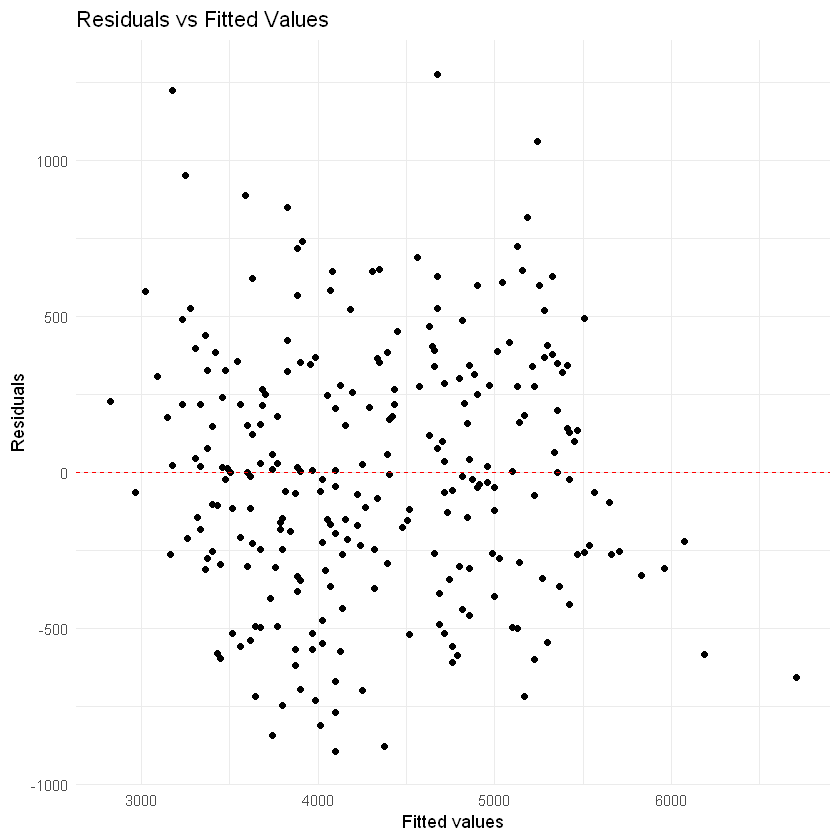

In [20]:
# Homoscedasticity assumption and Independence :


ggplot(data.frame(Fitted = fitted_values, Residuals = residuals), aes(x = Fitted, y = Residuals)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(x = "Fitted values", y = "Residuals", title = "Residuals vs Fitted Values") +
  theme_minimal()

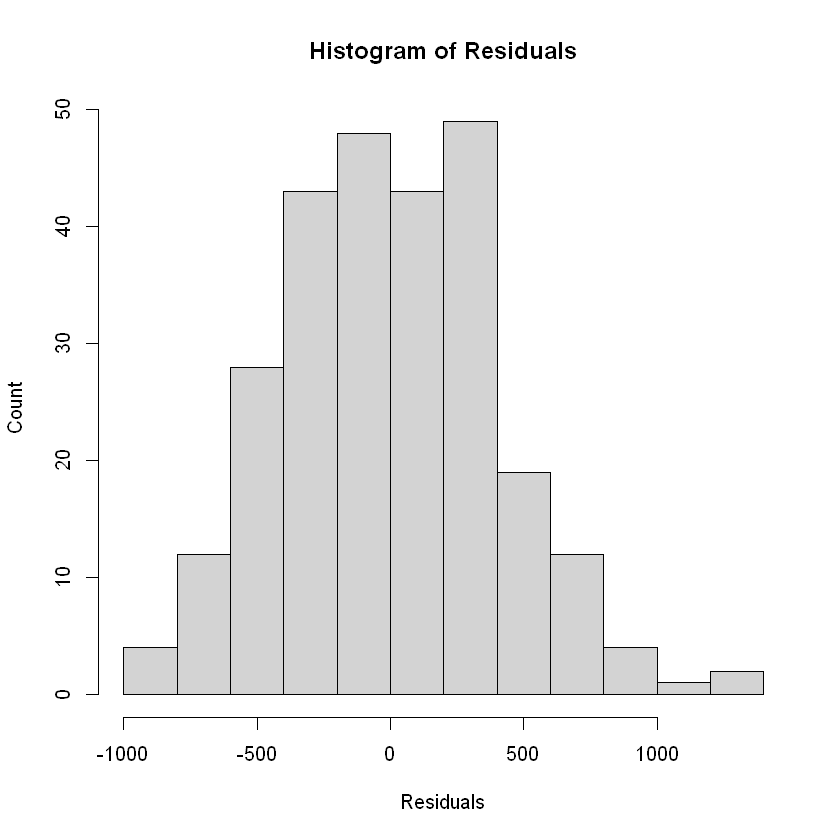

In [21]:
# Normality assumption :

## Method 1 :
# Assuming residuals is already calculated
hist(residuals, 
     xlab = 'Residuals', ylab = 'Count',
     main = 'Histogram of Residuals')

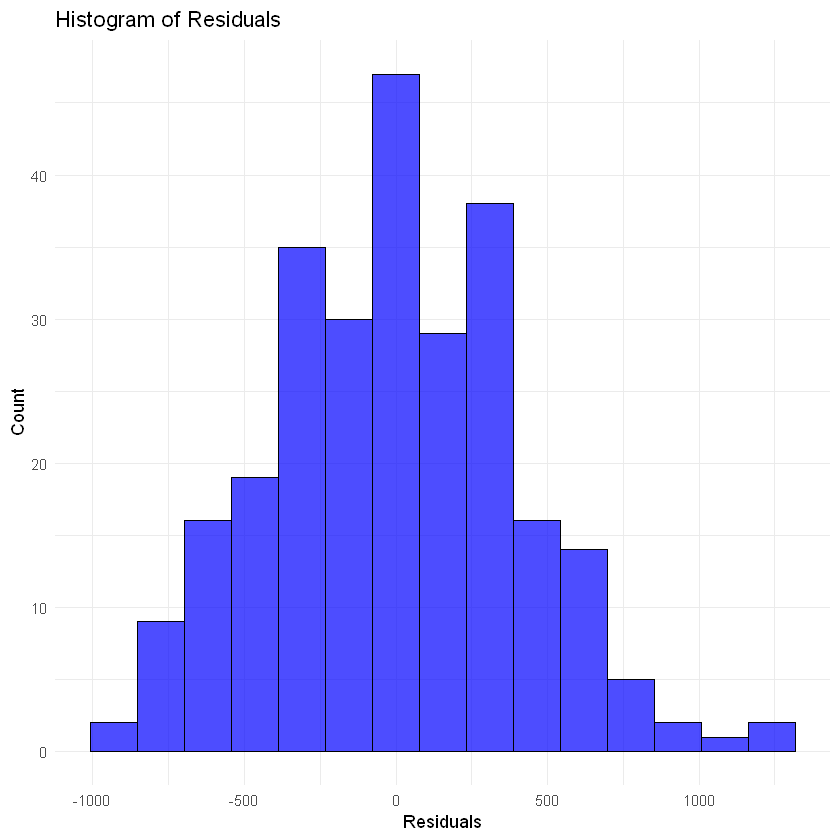

In [22]:
## Method with ggplot2:

ggplot(data.frame(Residuals = residuals), aes(x = Residuals)) +
  geom_histogram(bins = 15, fill = 'blue', color = 'black', alpha = 0.7) +
  labs(x = 'Residuals', y = 'Count', title = 'Histogram of Residuals') +
  theme_minimal()

**Remark:** The residuals are a little bit scued in the histogram, so I'm going to create a q-q plot to verify normality.m

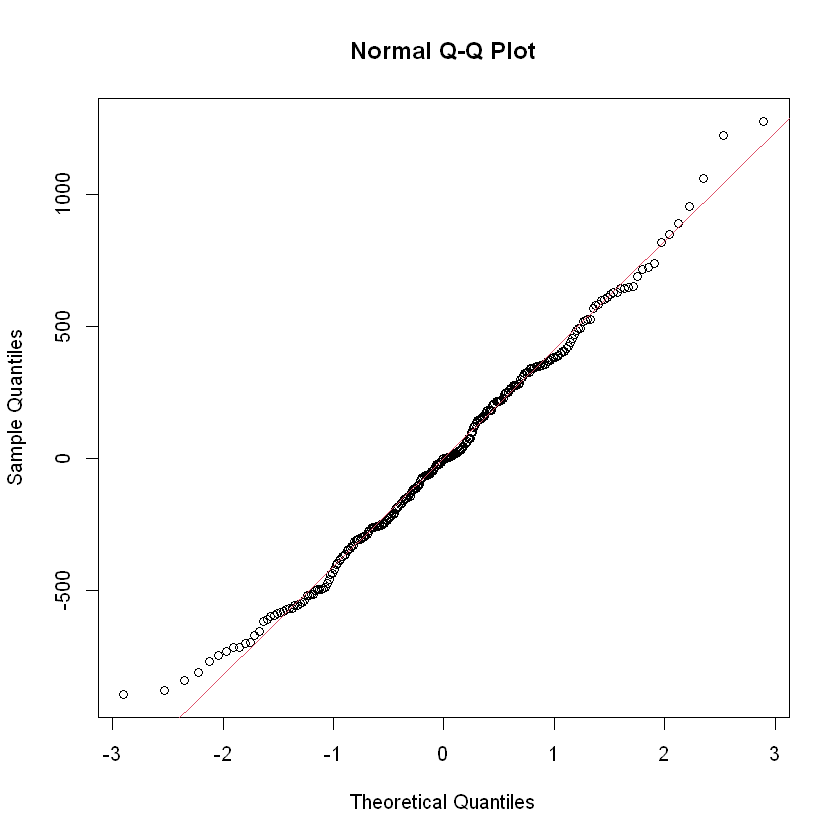

In [23]:
## Method 1
 
qqnorm(residuals)
qqline(residuals, col = 2)

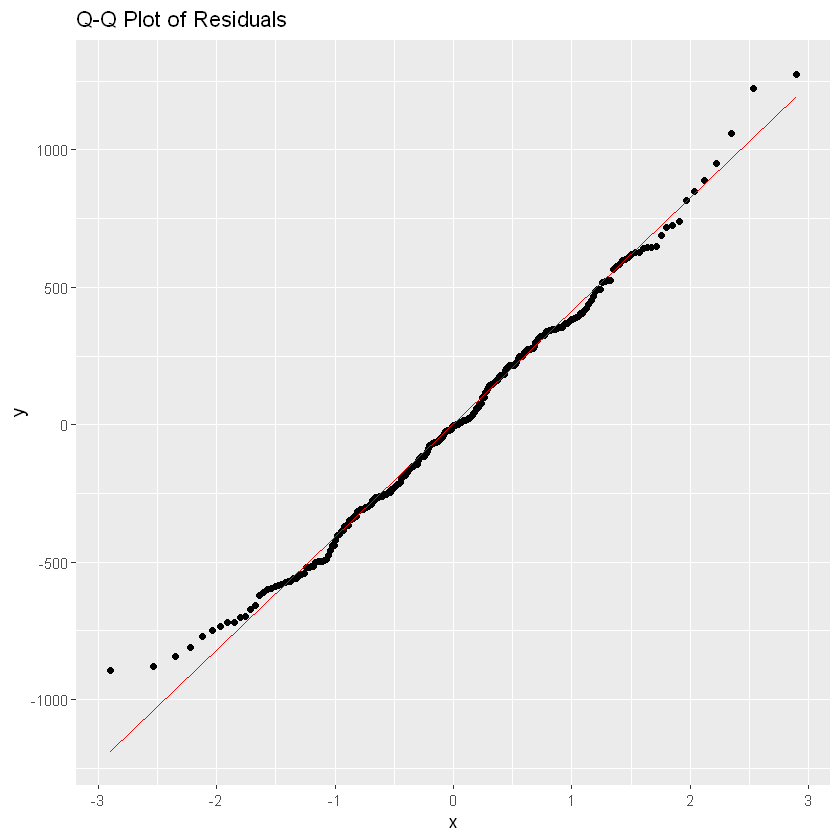

In [24]:
## Method 2 (ggplot2):

ggplot(data.frame(Residuals = residuals), aes(sample = Residuals)) +
  stat_qq() +
  stat_qq_line(col = "red") +
  labs(title = "Q-Q Plot of Residuals")

# 2) Multiple Linear Regression (MLR)

In [25]:
df <- select(penguins, -year)
head(df)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
Adelie,Torgersen,39.1,18.7,181,3750,male
Adelie,Torgersen,39.5,17.4,186,3800,female
Adelie,Torgersen,40.3,18.0,195,3250,female
Adelie,Torgersen,NA,NA,NA,NA,NA
Adelie,Torgersen,36.7,19.3,193,3450,female
Adelie,Torgersen,39.3,20.6,190,3650,male


In [26]:
df <- df[c("bill_length_mm", "body_mass_g", "sex", "species")] %>% 
    rename(
    gender = sex) %>% 
    na.omit()

head(df)

bill_length_mm,body_mass_g,gender,species
<dbl>,<int>,<fct>,<fct>
39.1,3750,male,Adelie
39.5,3800,female,Adelie
40.3,3250,female,Adelie
36.7,3450,female,Adelie
39.3,3650,male,Adelie
38.9,3625,female,Adelie


## Build the model

In [27]:
install.packages("caret")

Installing package into 'C:/Users/Badr/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Badr\AppData\Local\Temp\RtmpMVSvF9\downloaded_packages


In [28]:
library(caret)

# Set seed for reproducibility
set.seed(42)

# Create indices for the split (tain size is 70%)
split_indices <- createDataPartition(df$body_mass_g, p = 0.7, list = FALSE)

# Split the data
train_data <- df[split_indices, ]
test_data <- df[-split_indices, ]

# Define the formula
model_formula <- body_mass_g ~ bill_length_mm + gender + species

# Fit the model
model <- lm(model_formula, data = train_data)

# Display model summary
summary(model)

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift





Call:
lm(formula = model_formula, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-719.55 -204.62  -20.66  195.05  892.65 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2364.362    302.367   7.820 1.88e-13 ***
bill_length_mm     27.525      8.197   3.358 0.000918 ***
gendermale        555.774     49.271  11.280  < 2e-16 ***
speciesChinstrap -285.091     95.702  -2.979 0.003201 ** 
speciesGentoo    1132.987     84.375  13.428  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 289.8 on 231 degrees of freedom
Multiple R-squared:  0.8687,	Adjusted R-squared:  0.8664 
F-statistic:   382 on 4 and 231 DF,  p-value: < 2.2e-16


**The Row : gendermale ** 


The way the variable `gender` was encoded was **male is 1**, and **female is 0**, this means that the baseline or reference point is female penguins, so the coefficient indicates how much body mass would differ between 2 penguins that only differ in `gender` (cahier p. 107 **default**).

Assuming the penguins are the same species, and have the same building, we expect the male penguin's body mass to be about 555.77g more than the female penguin.

The **p-value** is very small, so this coefficient is **statistically significant**.

Now, let's consider the row for **bill_length_mm** :

Assuming that 2 penguins are the same gender, and species, if the bill length increases by *1mm*, we would expect the penguin with the longer built to be about **27.52g larger** in body mass.

The **p-value** is very small, so te estimate is **statistically significant**.

The OLS summary table also gives model evaluation metrics like **$R^2$** which is **0.8687**, indicating that the model explains about **86.87% of the variance in body mass**, this seems reasonable.

In [29]:
#Predictions
predictions <- predict(model, newdata = test_data)

# Calculate residuals
residuals <- test_data$body_mass_g - predictions

# Assess model performance
summary(residuals)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-802.58 -222.03   19.44   16.27  265.12  804.58 

In [30]:
# Calculate Mean Squared Error
mse <- mean(residuals^2)
cat("Mean Squared Error:", mse, "\n")

# Calculate Root Mean Squared Error
rmse <- sqrt(mse)
cat("Root Mean Squared Error:", rmse, "\n")

Mean Squared Error: 121908.8 
Root Mean Squared Error: 349.1543 
